In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
dataset = load_diabetes()

In [5]:
dataset['DESCR']

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [6]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [8]:
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [10]:
## Independent and dependent features
X = df
y = dataset['target']

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

<Axes: >

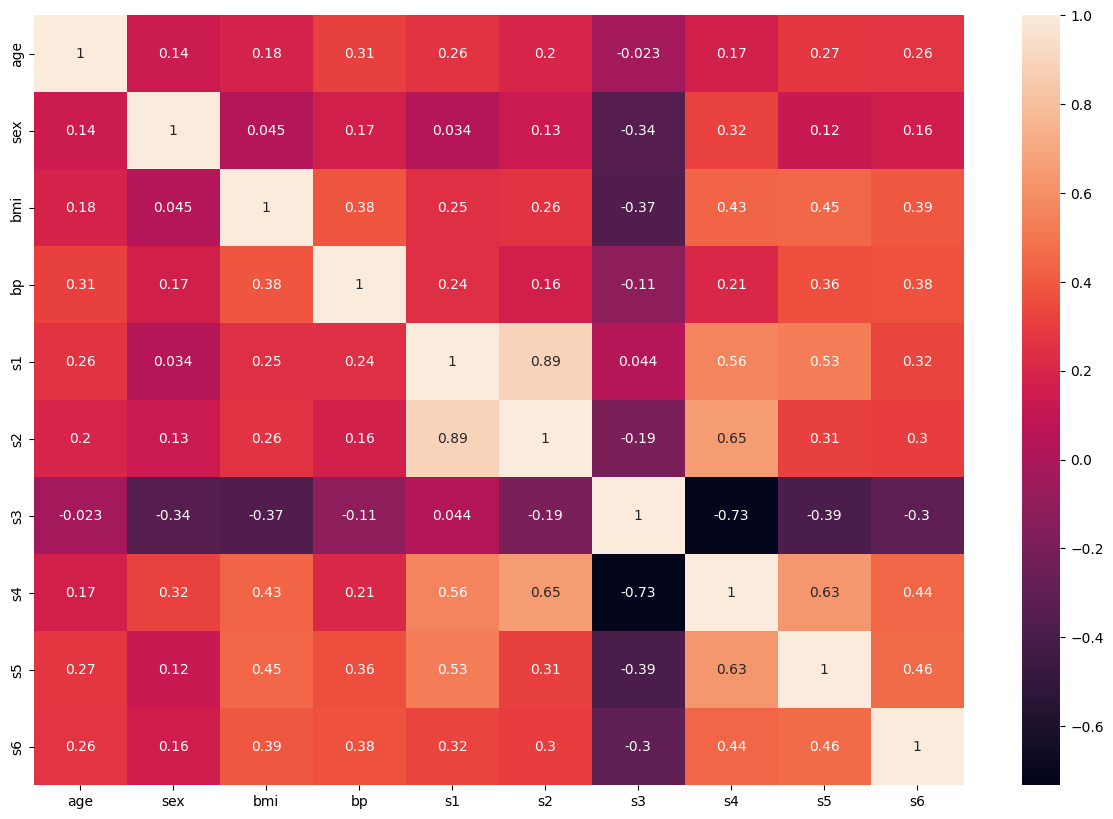

In [12]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [13]:
from sklearn.tree import DecisionTreeRegressor

regressor =DecisionTreeRegressor()
regressor.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Hyperparameter Tuning

In [14]:
param = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['auto','sqrt','log2']
}

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
grid = GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [18]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [19]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [21]:
y_pred = grid.predict(X_test)

In [22]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3184147361528985
48.52236657301629
3679.407020212869


In [24]:
selectModel = DecisionTreeRegressor(criterion= 'squared_error',
 max_depth= 3,
 max_features= 'sqrt',
 splitter= 'best')

In [28]:
selectModel.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.875, 'x[8] <= 0.022\nsquared_error = 6148.282\nsamples = 309\nvalue = 153.903'),
 Text(0.25, 0.625, 'x[6] <= -0.019\nsquared_error = 4633.616\nsamples = 206\nvalue = 126.388'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 0.024\nsquared_error = 5203.94\nsamples = 57\nvalue = 162.088'),
 Text(0.0625, 0.125, 'squared_error = 3216.713\nsamples = 38\nvalue = 143.395'),
 Text(0.1875, 0.125, 'squared_error = 7081.828\nsamples = 19\nvalue = 199.474'),
 Text(0.375, 0.375, 'x[8] <= -0.037\nsquared_error = 3741.391\nsamples = 149\nvalue = 112.732'),
 Text(0.3125, 0.125, 'squared_error = 2120.191\nsamples = 57\nvalue = 90.193'),
 Text(0.4375, 0.125, 'squared_error = 4236.103\nsamples = 92\nvalue = 126.696'),
 Text(0.75, 0.625, 'x[5] <= 0.05\nsquared_error = 4635.306\nsamples = 103\nvalue = 208.932'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[3] <= 0.061\nsquared_error = 3717.576\nsamples = 71\nvalue = 221.662'),
 Text(0.5625, 0.125, 'squared_error = 3484.034

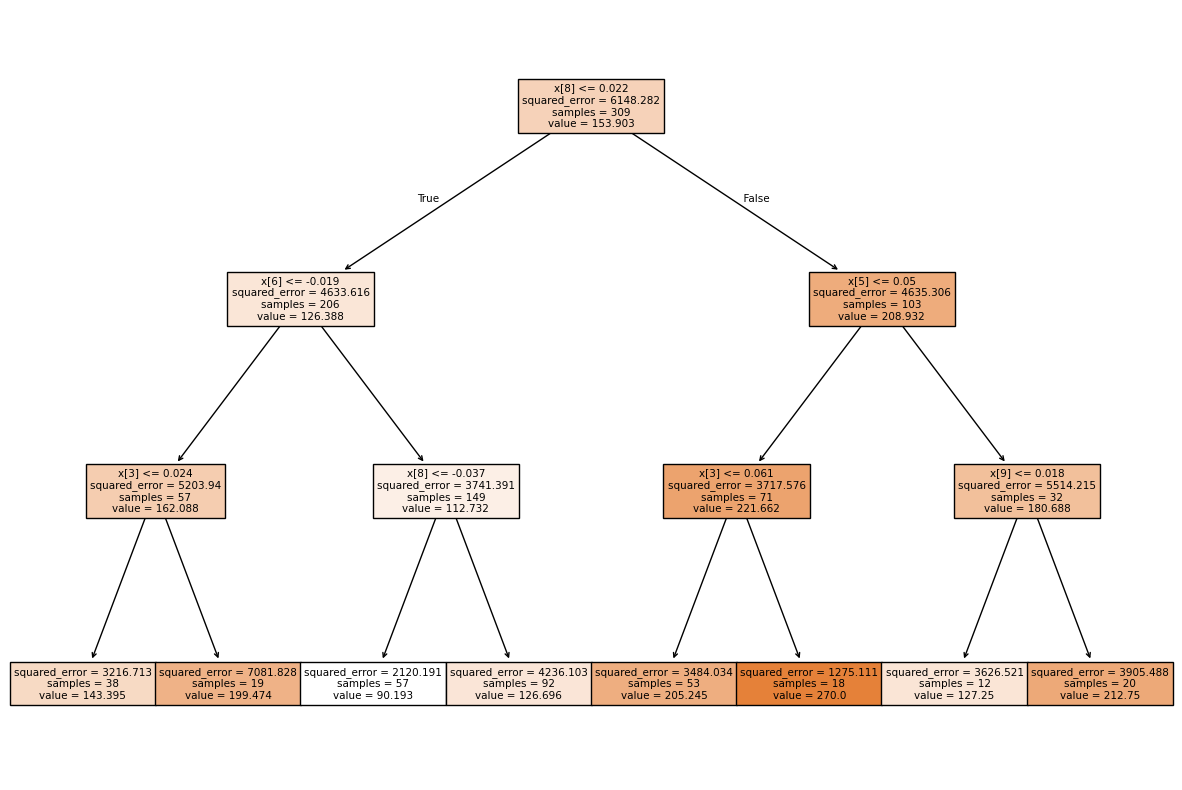

In [29]:
## Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectModel,filled=True)